In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("/content/kc_house_data.csv")

id: Unique identifier for each home.

date: Date the house was sold.

price: The price the house sold for.

bedrooms: Number of bedrooms.

bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower.

sqft_living: The interior living space area in square feet.

sqft_lot: The land space area in square feet.

floors: Number of floors (levels) in the house.

waterfront: Binary indicator if the house has a waterfront view.

view: An index from 0 to 4 of how good the view of the property was.

condition: Condition of the house, ranked from 1 to 5.

grade: Overall grade of the house, ranked from 1 to 13, where 1-3 falls short of building code, 7 is an average grade, and 11-13 have a high quality of construction and design.

sqft_above: The interior living space area above ground level in square feet.

sqft_basement: The interior living space area below ground level in square feet.

yr_built: The year the house was built.

yr_renovated: The year the house was renovated.

zipcode: The ZIP code where the house is located.

lat: Latitude coordinate.

long: Longitude coordinate.

sqft_living15: The interior living space area of the house plus 15 nearest neighbors in square feet.

sqft_lot15: The land space area of the house plus 15 nearest neighbors in square feet.

In [78]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [79]:
df.shape

(21613, 21)

In [80]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [81]:
df.drop("id",axis=1,inplace=True)

In [82]:
df.drop(["zipcode","lat","long"],inplace=True,axis=1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [84]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [85]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [86]:
import plotly.express as px
px.histogram(df["price"])

In [87]:
px.box(df["price"])

<Axes: xlabel='bedrooms', ylabel='count'>

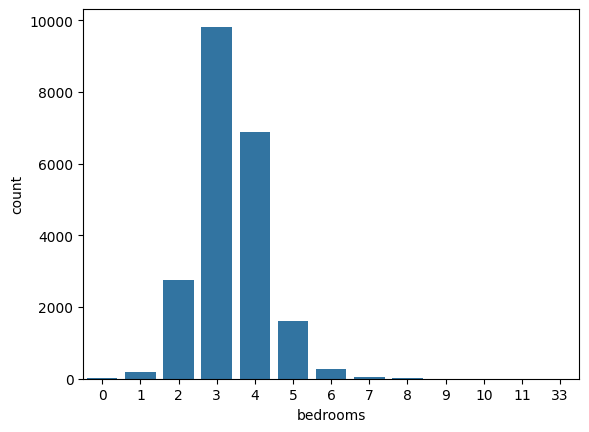

In [88]:
sns.countplot(x=df["bedrooms"])

<Axes: xlabel='floors', ylabel='count'>

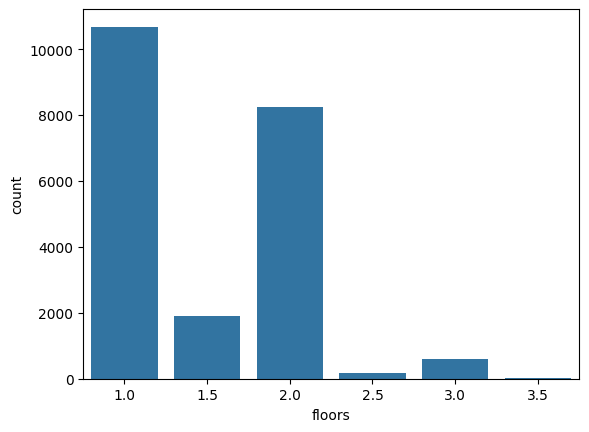

In [89]:
sns.countplot(x=df["floors"])

<Axes: xlabel='bathrooms', ylabel='count'>

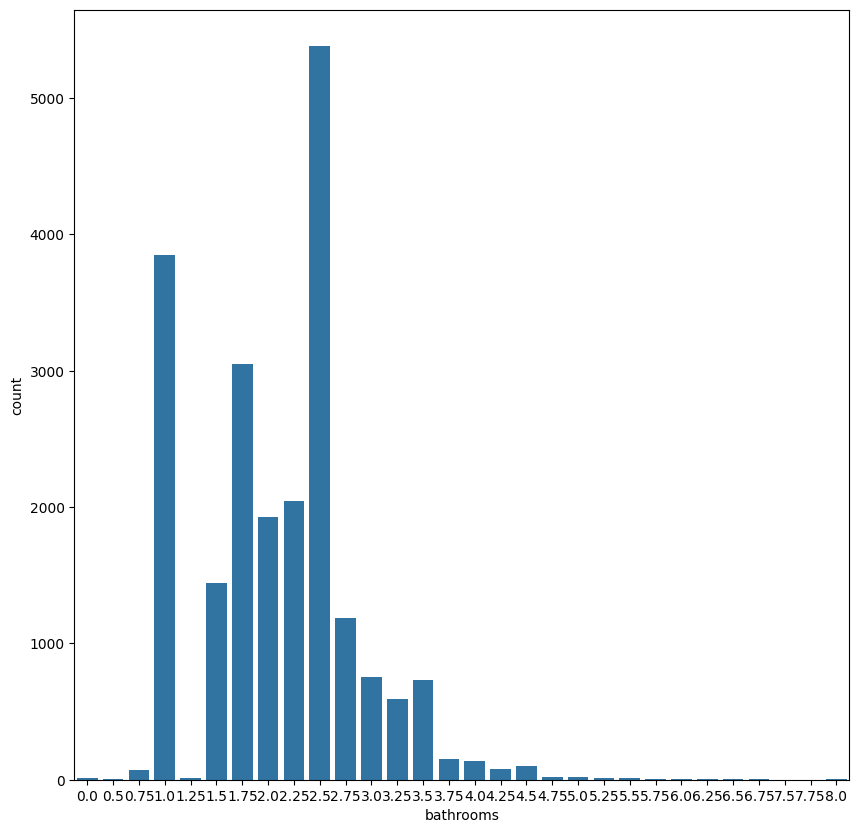

In [90]:
plt.figure(figsize=(10,10))
sns.countplot(x=df["bathrooms"])

<Axes: xlabel='grade', ylabel='count'>

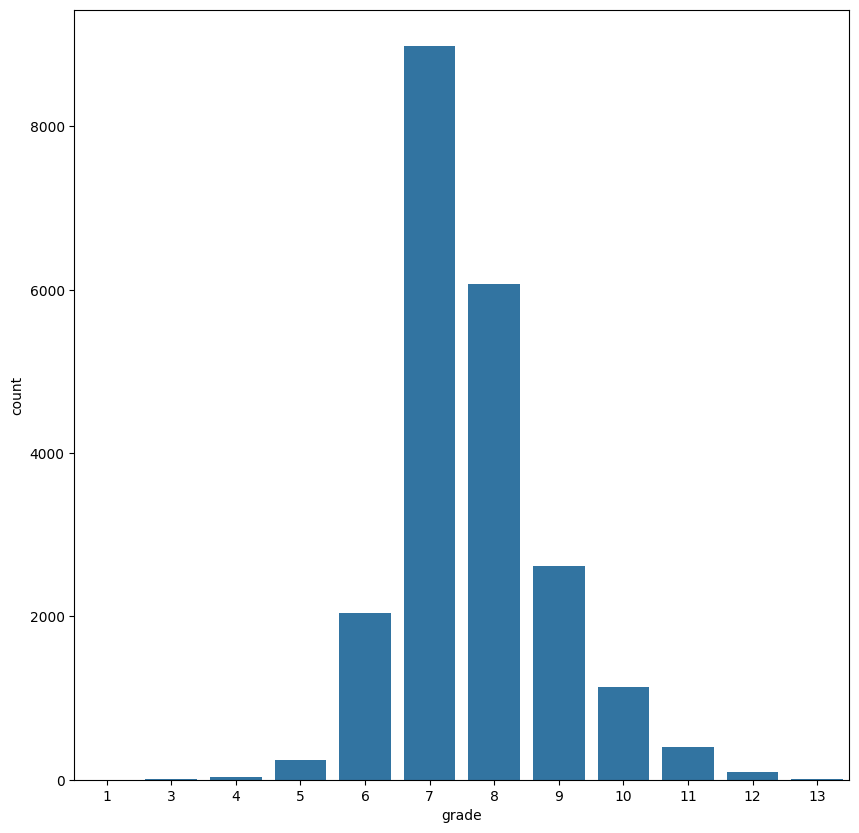

In [91]:
plt.figure(figsize=(10,10))
sns.countplot(x=df["grade"])

In [92]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

<Axes: xlabel='sqft_above', ylabel='Count'>

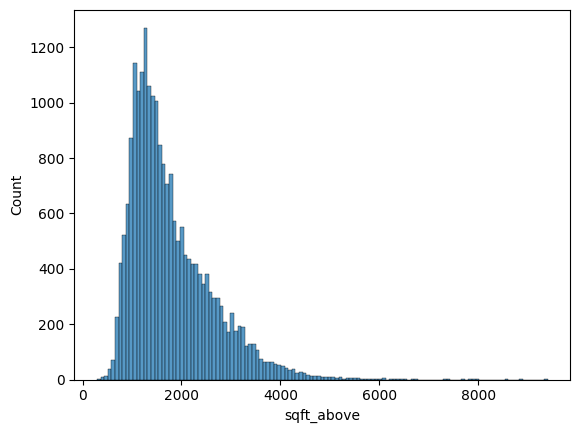

In [93]:
sns.histplot(x=df["sqft_above"])

<Axes: xlabel='sqft_living', ylabel='Count'>

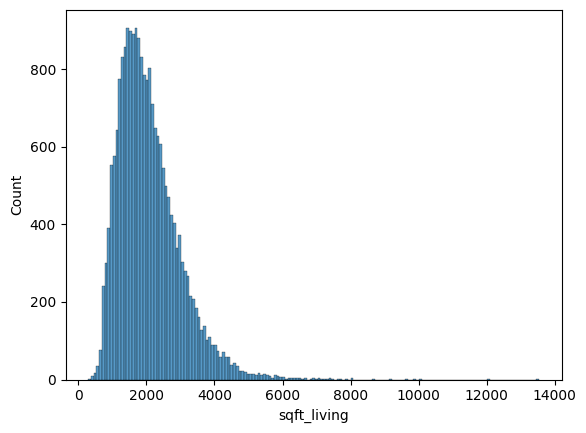

In [94]:
sns.histplot(x=df["sqft_living"])

<Axes: xlabel='sqft_lot', ylabel='Count'>

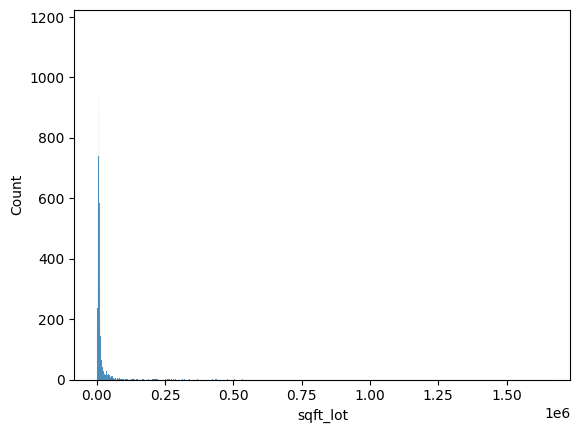

In [95]:
sns.histplot(x=df["sqft_lot"])

In [96]:
px.histogram(df["sqft_lot"])

In [97]:
px.histogram(df["sqft_living15"])

<Axes: xlabel='condition', ylabel='count'>

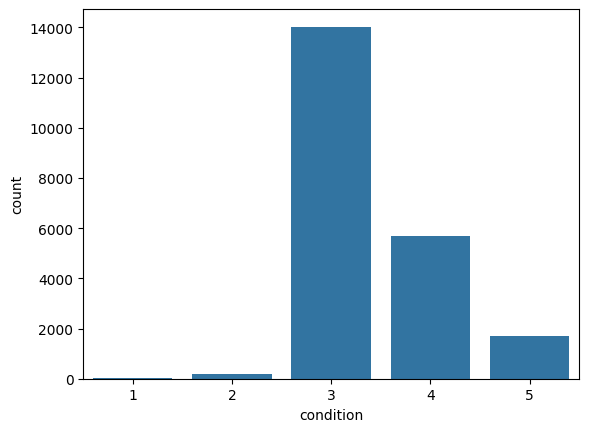

In [98]:
sns.countplot(x=df["condition"])

<Axes: xlabel='bedrooms', ylabel='price'>

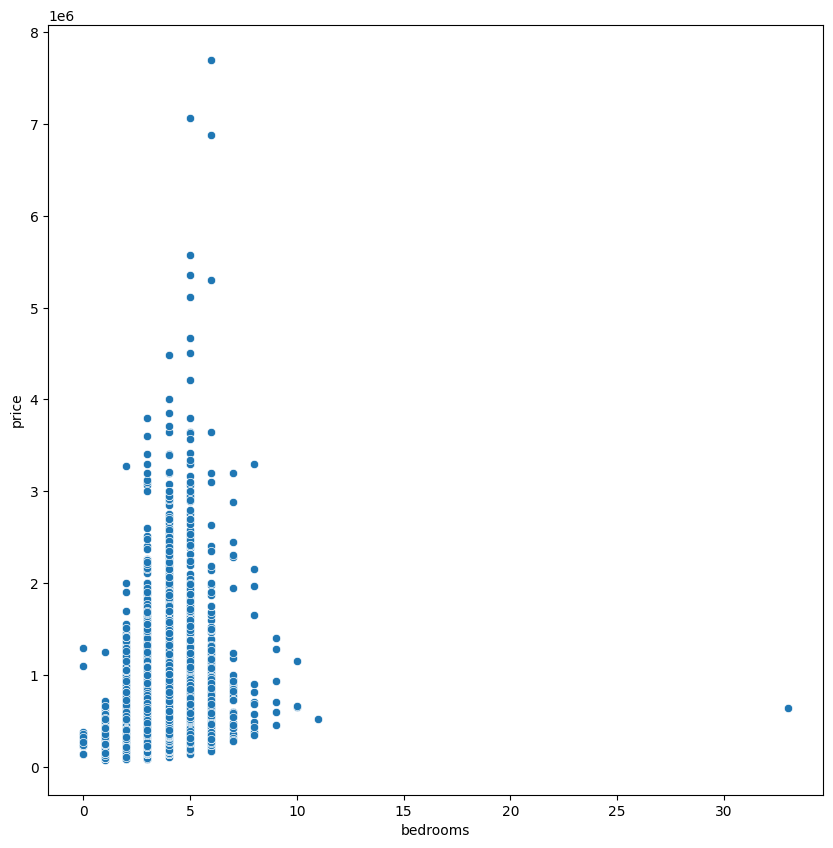

In [99]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["bedrooms"],y=df["price"])

<Axes: xlabel='bathrooms', ylabel='price'>

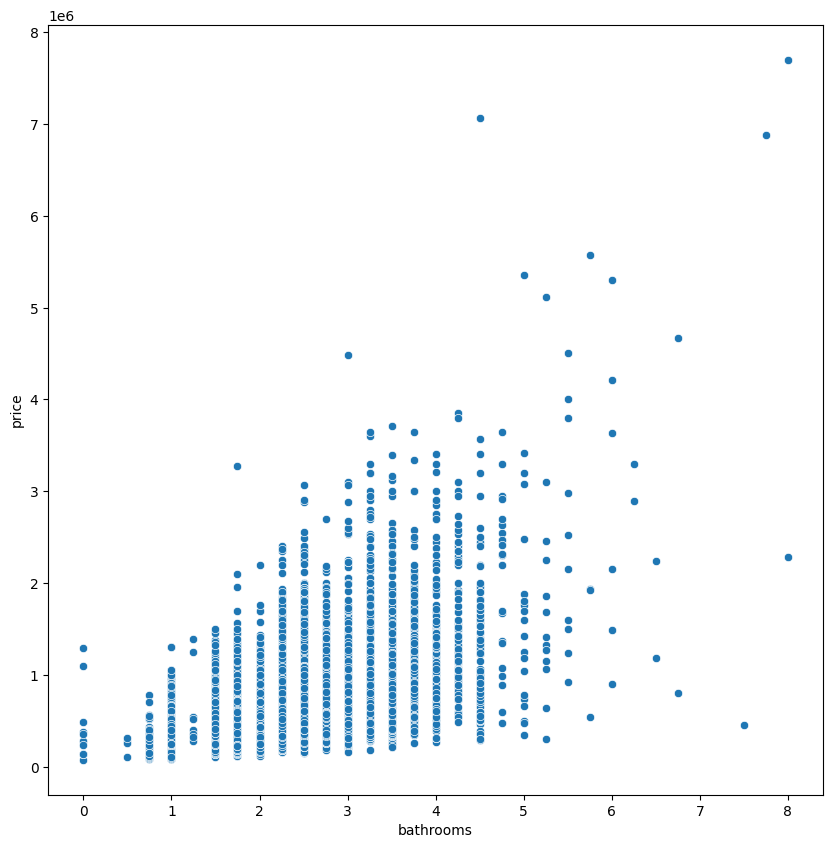

In [100]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["bathrooms"],y=df["price"])

In [101]:
df["age"]=2024-df["yr_built"]

In [102]:
df["age"]

0        69
1        73
2        91
3        59
4        37
         ..
21608    15
21609    10
21610    15
21611    20
21612    16
Name: age, Length: 21613, dtype: int64

<Axes: xlabel='age', ylabel='price'>

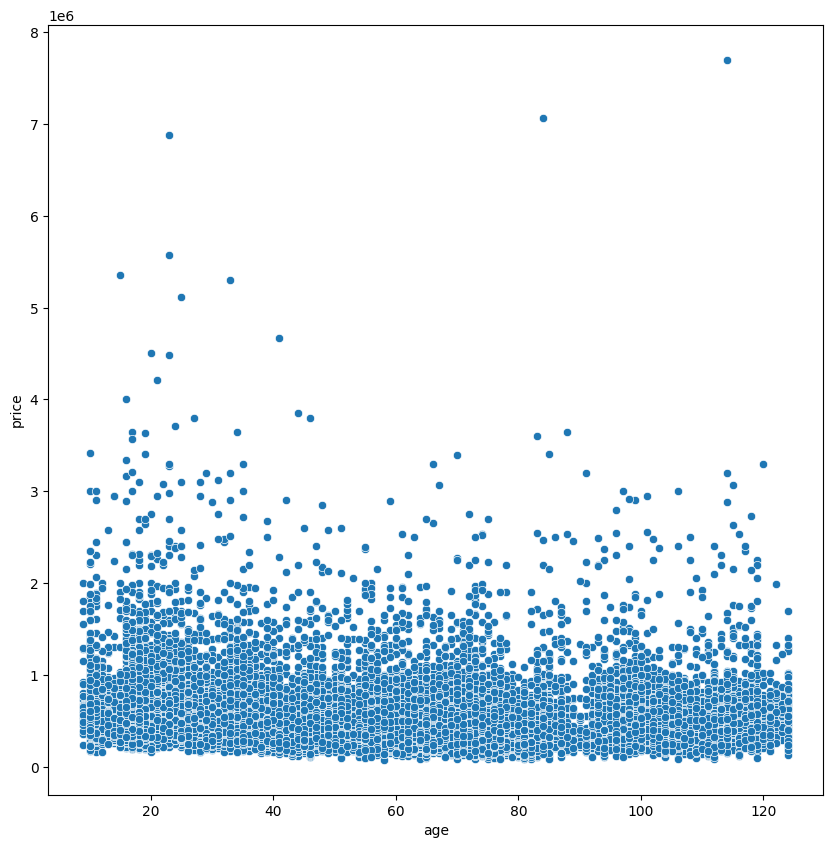

In [103]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["age"],y=df["price"])

In [104]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'age'],
      dtype='object')

<Axes: xlabel='sqft_lot', ylabel='price'>

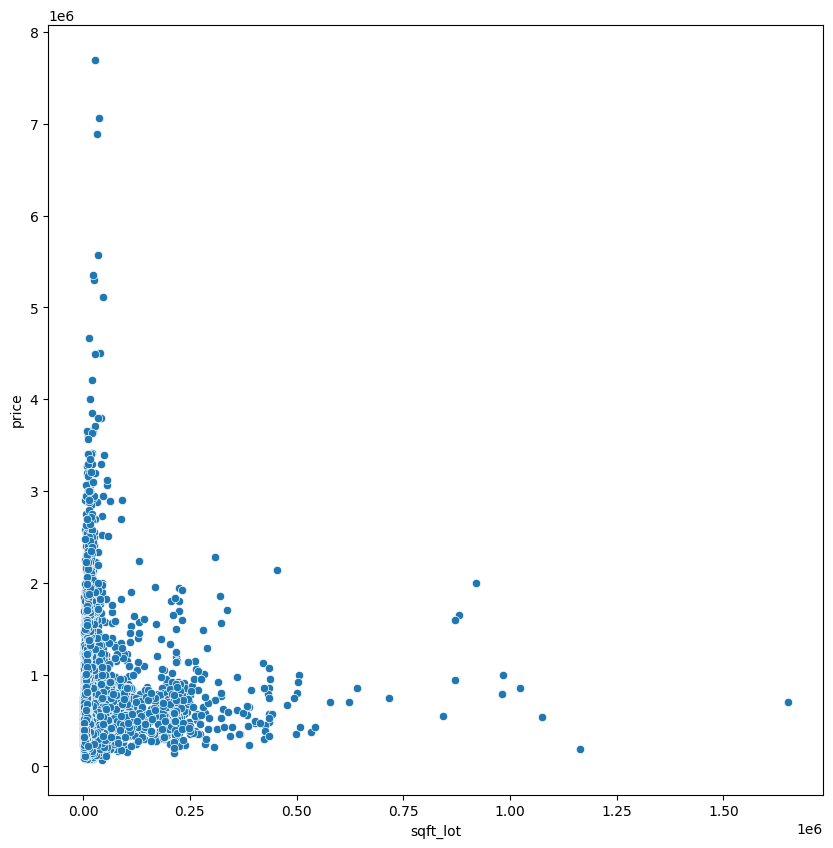

In [105]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["sqft_lot"],y=df["price"])

<Axes: xlabel='sqft_living15', ylabel='price'>

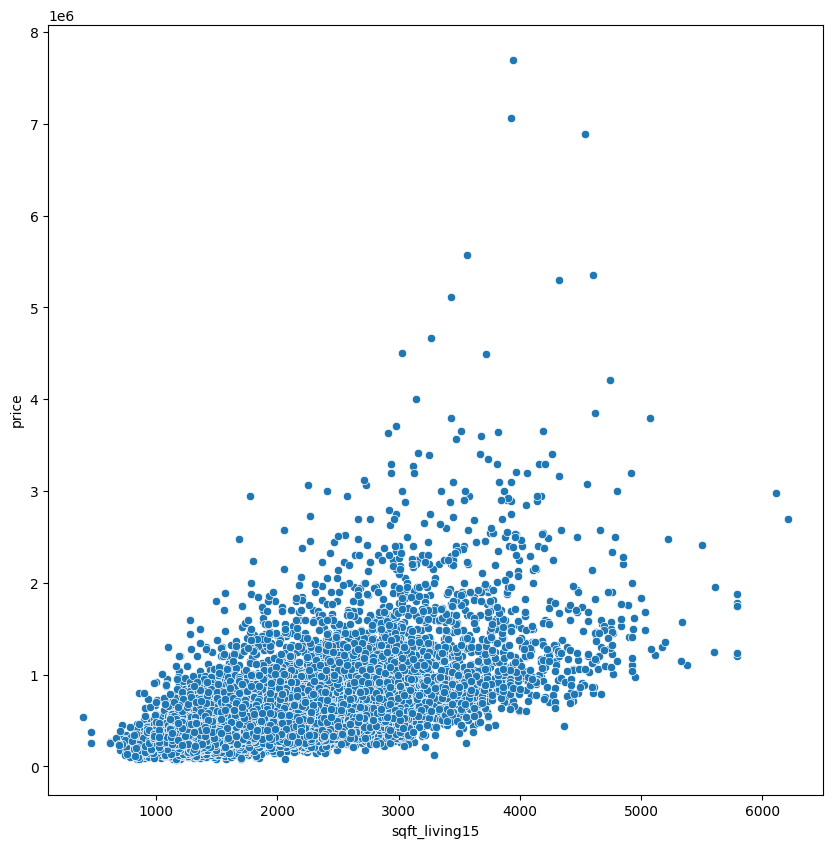

In [106]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["sqft_living15"],y=df["price"])

<Axes: xlabel='sqft_living', ylabel='price'>

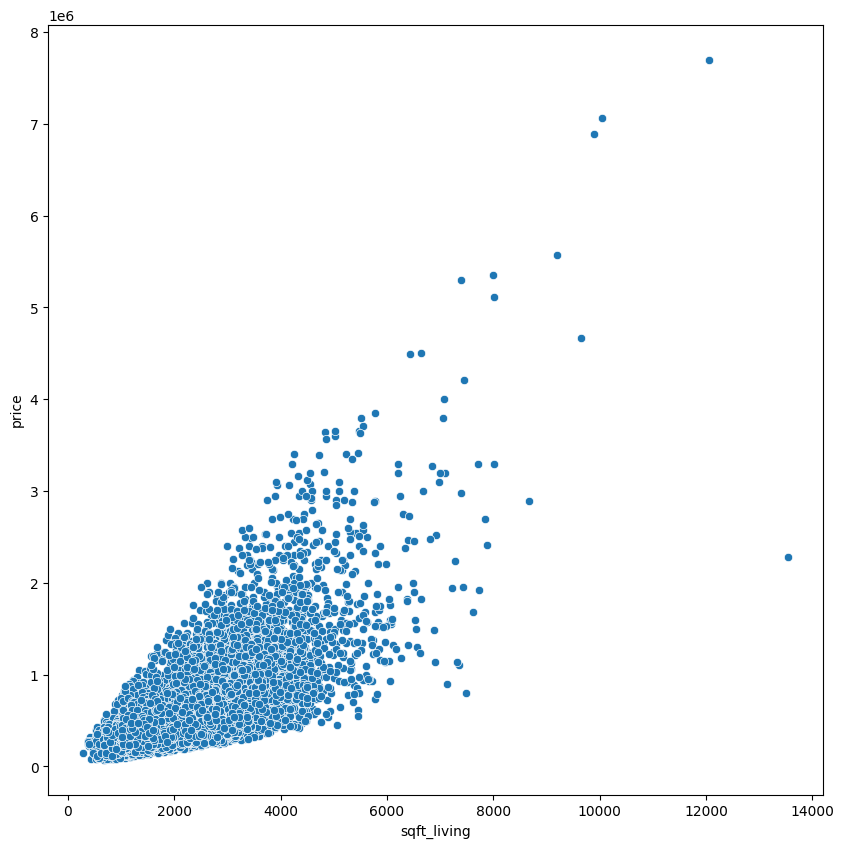

In [107]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["sqft_living"],y=df["price"])

In [108]:
df.drop(["yr_built","date"],inplace=True,axis=1)

<Axes: >

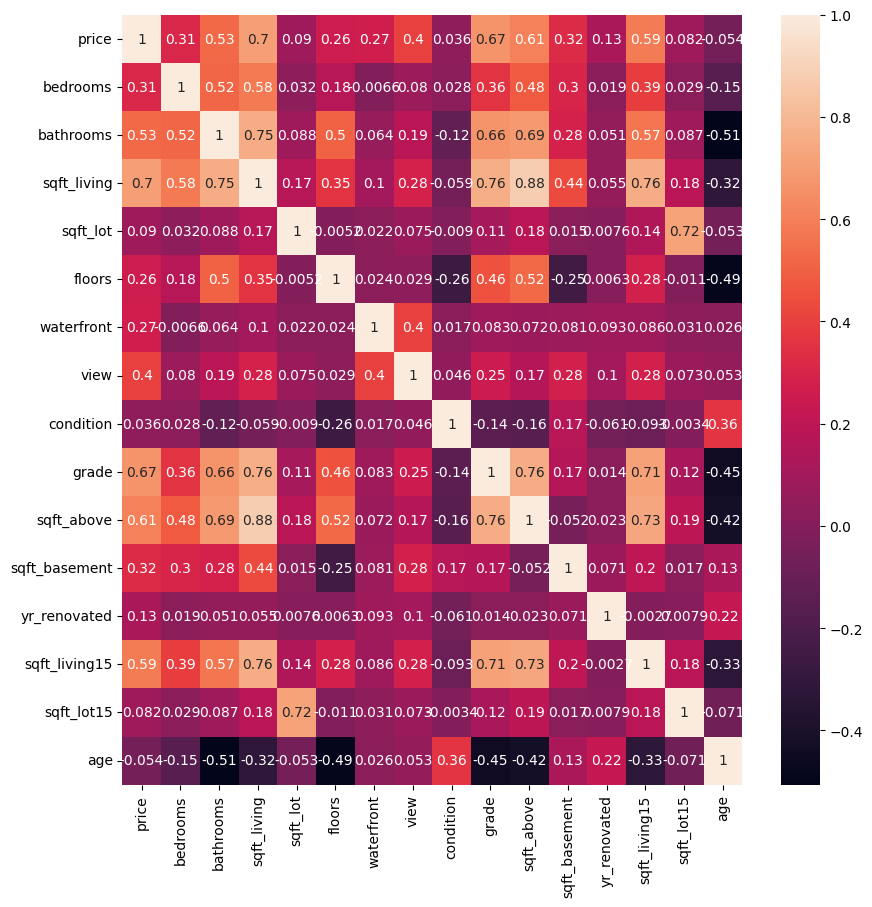

In [109]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [110]:
df.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

In [111]:
x=df["sqft_living"]
y=df["price"]

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [113]:
print("x_train size = ", x_train.shape)
print("y_train size = ", y_train.shape)
print("x_test size = ", x_test.shape)
print("y_test size = ", y_test.shape)

x_train size =  (17290,)
y_train size =  (17290,)
x_test size =  (4323,)
y_test size =  (4323,)


In [114]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [115]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train))

LinearRegression()

In [116]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [117]:
lr.coef_

array([279.55477932])

In [118]:
lr.intercept_

-41999.18603993731

In [119]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
735,365000.0,5.366792e+05
2830,865000.0,7.687097e+05
4106,1038000.0,1.011922e+06
16218,1490000.0,1.232771e+06
19964,711000.0,6.708655e+05
...,...,...
13674,338000.0,3.074443e+05
20377,673000.0,7.491408e+05
8805,285000.0,6.384371e+05
10168,605000.0,5.869991e+05


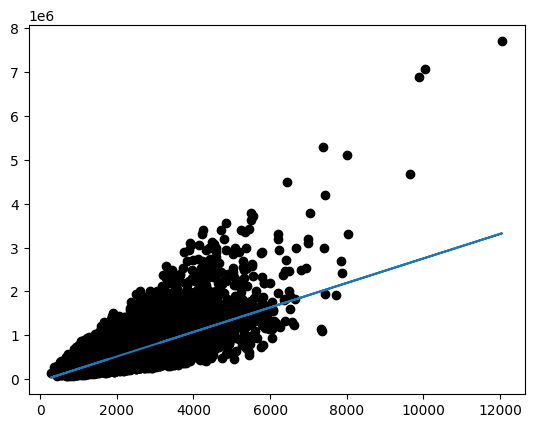

In [120]:
plt.scatter(np.array(x_train).reshape(-1,1), y_train, color='black')
plt.plot(x_train, lr.predict(np.array(x_train).reshape(-1,1)))

In [121]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [122]:
print("MAE = ", mean_absolute_error(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R Squared = ", r2_score(y_test, y_pred))

MAE =  177867.54034434858
MSE =  76484977061.77612
RMSE =  276559.1746114674
R Squared =  0.49406905389089006


In [123]:
lr.score(np.array(x_test).reshape(-1,1),y_test)

0.49406905389089006

In [124]:
#Multiple LR

In [125]:
x=df.drop("price",axis=1)
y=df["price"]

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [127]:
print("x_train size = ", x_train.shape)
print("y_train size = ", y_train.shape)
print("x_test size = ", x_test.shape)
print("y_test size = ", y_test.shape)

x_train size =  (17290, 15)
y_train size =  (17290,)
x_test size =  (4323, 15)
y_test size =  (4323,)


In [128]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [129]:
lr_model.coef_

array([-3.86207534e+04,  4.89708583e+04,  1.08193320e+02, -4.52535774e-02,
        2.81204344e+04,  5.55592909e+05,  4.37789469e+04,  1.71669643e+04,
        1.18063572e+05,  5.07156967e+01,  5.74776229e+01,  1.09041872e+01,
        2.54813410e+01, -4.61010059e-01,  3.62179096e+03])

In [130]:
print("MAE = ", mean_absolute_error(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))
print("RMAE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R Squared = ", r2_score(y_test, y_pred))

MAE =  143187.80429161512
MSE =  52291717658.994446
RMAE =  228673.82372933385
R Squared =  0.6541020314679931


In [131]:
lr_model.score(x_test,y_test)

0.6541020314679931